# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

In [59]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [60]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


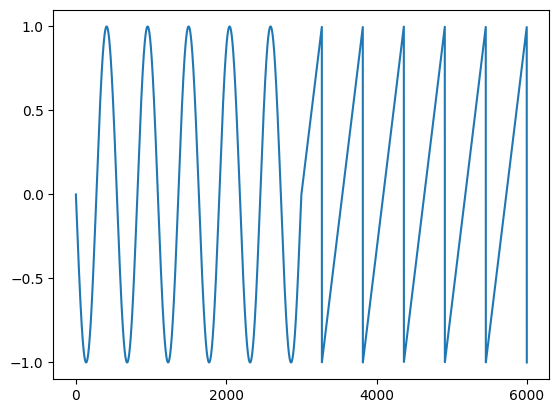

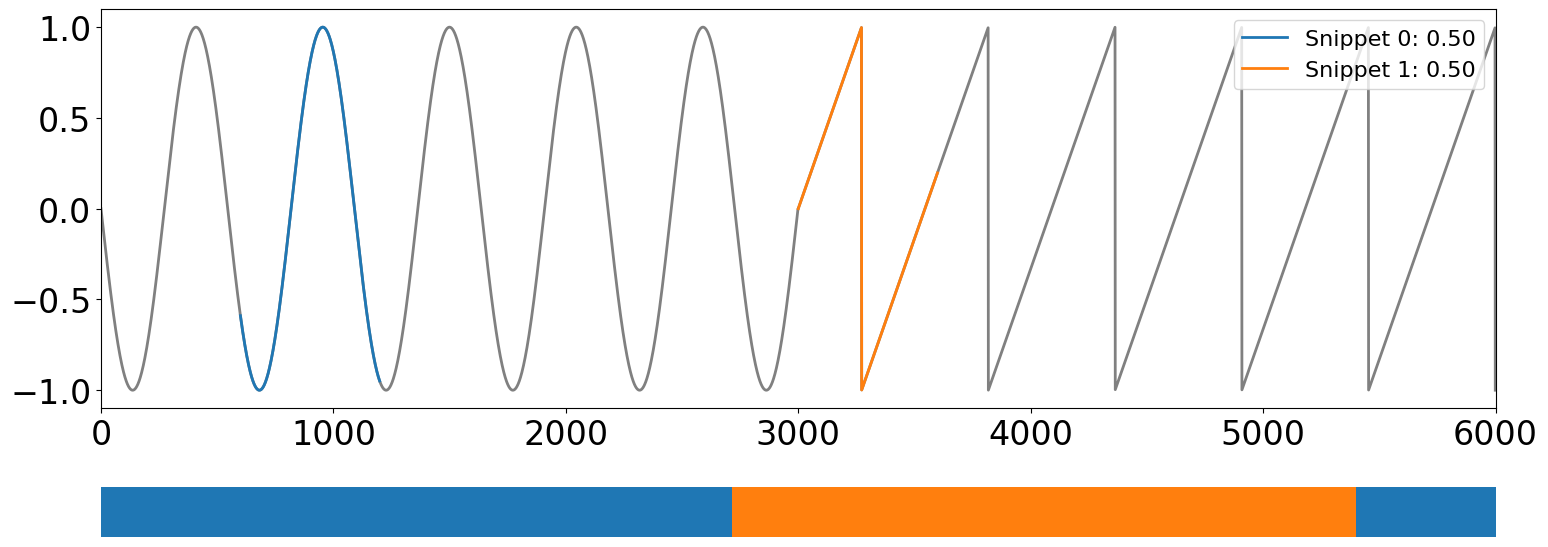

<Axes: >

In [61]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stumpy import snippets
from modules.snippets import plot_snippets

In [63]:
# Загрузка данных из файла
data = pd.read_csv('./datasets/PAMAP/PAMAP.txt', delimiter=" ", header=None)

In [64]:

# Задание интервала времени и выбор колонки угла тангажа (примерный индекс колонки)
start_time, end_time = -20, 500
time_column = 0  #  колонка с временными метками — первая
y_gyro_column = 10  #  угол тангажа по оси Y в колонке 10

# Фильтрация данных по времени и извлечение нужной колонки
filtered_data = data[(data[time_column] >= start_time) & (data[time_column] <= end_time)]
y_gyro_data = filtered_data[y_gyro_column].dropna().values

In [65]:


print(data.head())  # Show the first few rows to verify column structure
print(data.columns)  # Verify the columns and their indexes

# Check the time range
print(data[data[time_column] >= start_time].shape)  # See if data exists after start_time
print(data[data[time_column] <= end_time].shape)    # See if data exists before end_time


       0           1           2          3          4          5       \
0  505.710000  505.720000  505.730000  505.74000  505.75000  505.76000   
1    2.000000    2.000000    2.000000    2.00000    2.00000    2.00000   
2         NaN         NaN   79.000000        NaN        NaN        NaN   
3   35.062500   35.062500   35.062500   35.06250   35.06250   35.06250   
4    0.497271    0.693164    0.929013    1.03968    1.07093    1.17319   

       6           7          8           9       ...      145990      145991  \
0  505.770000  505.780000  505.79000  505.800000  ...  2305.61000  2305.62000   
1    2.000000    2.000000    2.00000    2.000000  ...     4.00000     4.00000   
2         NaN         NaN        NaN         NaN  ...   110.00000         NaN   
3   35.062500   35.062500   35.06250   35.062500  ...    35.68750    35.68750   
4    0.981674    0.867429    0.82464    0.903157  ...     1.46933     1.74399   

       145992      145993      145994      145995      145996      1

In [66]:
print("Minimum time value:", data[time_column].min())
print("Maximum time value:", data[time_column].max())


Minimum time value: -23.9094
Maximum time value: 505.71


8


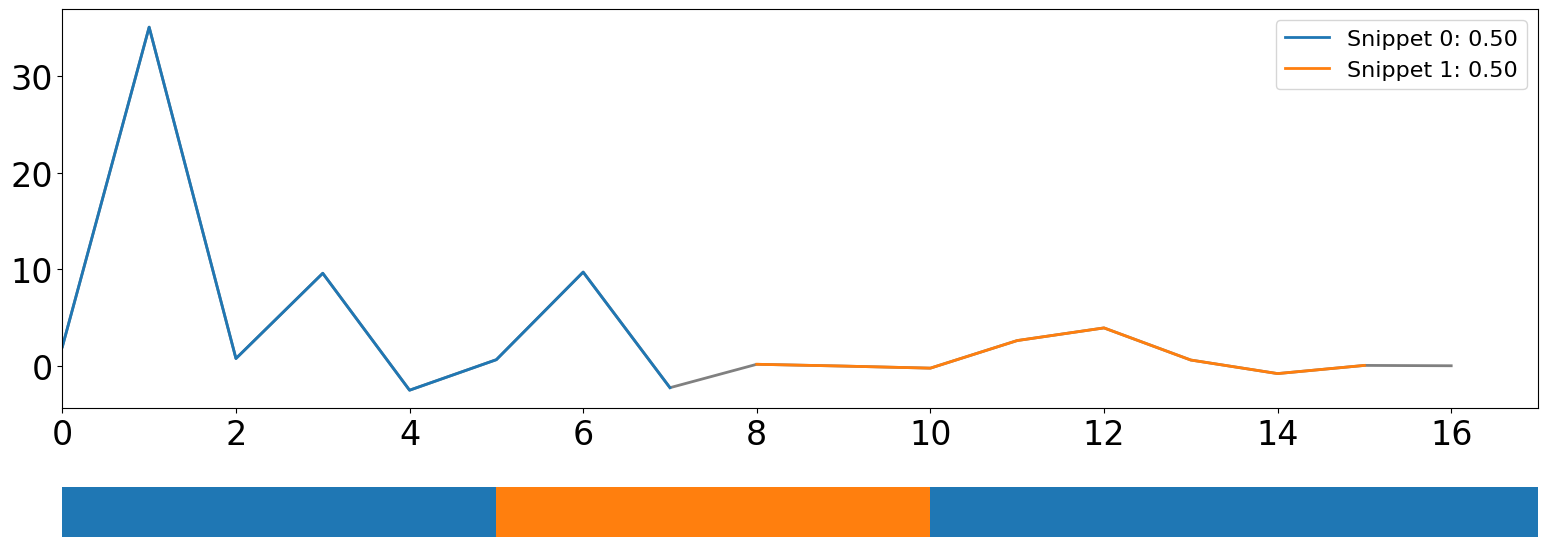

In [67]:
# Подбираем размер окна сниппета на основе длины отфильтрованных данных
window_size = min(8, len(y_gyro_data) // 2)

# Убедимся, что размер окна возможен при данной длине данных
if window_size > 1:
    snp = snippets(y_gyro_data, window_size, 2, percentage=0.5)
    plot_snippets(y_gyro_data, snp)
    plt.show()
else:
    print("Недостаточно точек данных для выделения сниппетов с текущим размером окна.")


Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

8


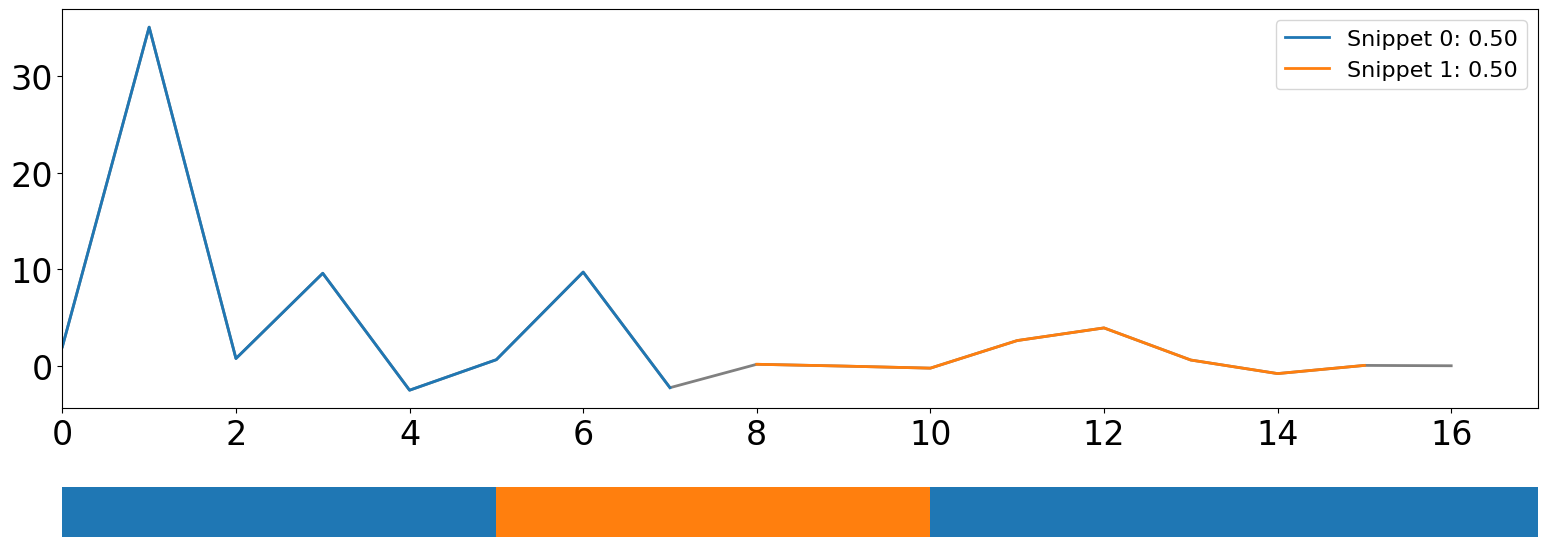

In [68]:
plot_snippets(y_gyro_data, snp)
plt.show()

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [82]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Загрузка истинных меток активности из данных
true_labels = filtered_data[1].values
# Инициализация предсказанных меток
predicted_labels = []
for snippet in snp[0]:  # Перебор сниппетов
        start, end = int(snippet[0]), int(snippet[1])
        label_slice = true_labels[start:end]
        label_slice = label_slice[label_slice >= 0]  # Исключение NaN и некорректных значений

        if len(label_slice) > 0:
            predicted_activity = np.bincount(label_slice.astype(int)).argmax()
            predicted_labels.extend([predicted_activity] * (end - start))
        else:
            predicted_labels.extend([0] * (end - start))  # Значение по умолчанию

    # Приведение длины predicted_labels к длине true_labels
predicted_labels = np.array(predicted_labels[:len(true_labels)])


    # Приведение true_labels к целочисленному типу
true_labels = true_labels.astype(int)

# Приведение длины predicted_labels к длине true_labels
predicted_labels = np.array(predicted_labels[:len(true_labels)])

# Оценка точности
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.53
Precision: 0.28
Recall: 0.53
F1 Score: 0.37


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

На представленном графике видны результаты анализа временного ряда с помощью алгоритма SnippetFinder. Верхняя часть графика показывает значения временного ряда (угол тангажа по оси Y гироскопа) в указанном временном интервале. На графике снизу отображена разметка найденных сниппетов (характерных подпоследовательностей).

Синие и оранжевые участки снизу представляют найденные сниппеты, которые характеризуют типичные паттерны в данных, при этом каждый цвет соответствует разным сниппетам. Легенда показывает процентное покрытие (по 50% для каждого сниппета), что указывает на равное распределение сниппетов по данным.

Содержательный смысл анализа:

Характерные паттерны: Алгоритм выделил два характерных паттерна (синие и оранжевые сниппеты) в угле тангажа. Это означает, что в данных присутствуют повторяющиеся временные подпоследовательности, которые алгоритм распознал как основные для данного временного ряда.

Распределение паттернов: Оба сниппета покрывают примерно половину временного ряда, что указывает на наличие как минимум двух доминирующих моделей поведения или движений, присутствующих в исследуемом интервале.

Метрики классификации: Результаты метрик (точность, полнота и F1) для модели составили:
Точность 53%: половина предсказаний совпадает с истинными метками, что указывает на умеренный уровень совпадения.
Точность и полнота по классам (precision и recall) около 28% и 53% соответственно. Это указывает на сложности в предсказании конкретных классов, но с умеренным общим охватом.
F1-Score 37%: комбинированная метрика, отражающая сбалансированность точности и полноты, указывает на возможность улучшения модели для более точного выявления паттернов.

В итоге, результаты показывают, что выделенные сниппеты представляют ключевые паттерны временного ряда, однако их предсказательная способность может быть улучшена.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [30]:
import pandas as pd
import numpy as np
from modules.snippets import plot_snippets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Загрузка данных
data = pd.read_csv('./datasets/PAMAP/PAMAP.txt', delimiter=" ", header=None)

# Указание временного интервала и нужных столбцов для осей X, Y, Z
time_column = 0
x_gyro_column, y_gyro_column, z_gyro_column = 9, 10, 11  # Примерные индексы гироскопа по осям X, Y, Z
# Фильтрация данных по времени
filtered_data = data[(data[time_column] >= start_time) & (data[time_column] <= end_time)]
x_gyro_data = filtered_data[x_gyro_column].dropna().values
y_gyro_data = filtered_data[y_gyro_column].dropna().values
z_gyro_data = filtered_data[z_gyro_column].dropna().values


7


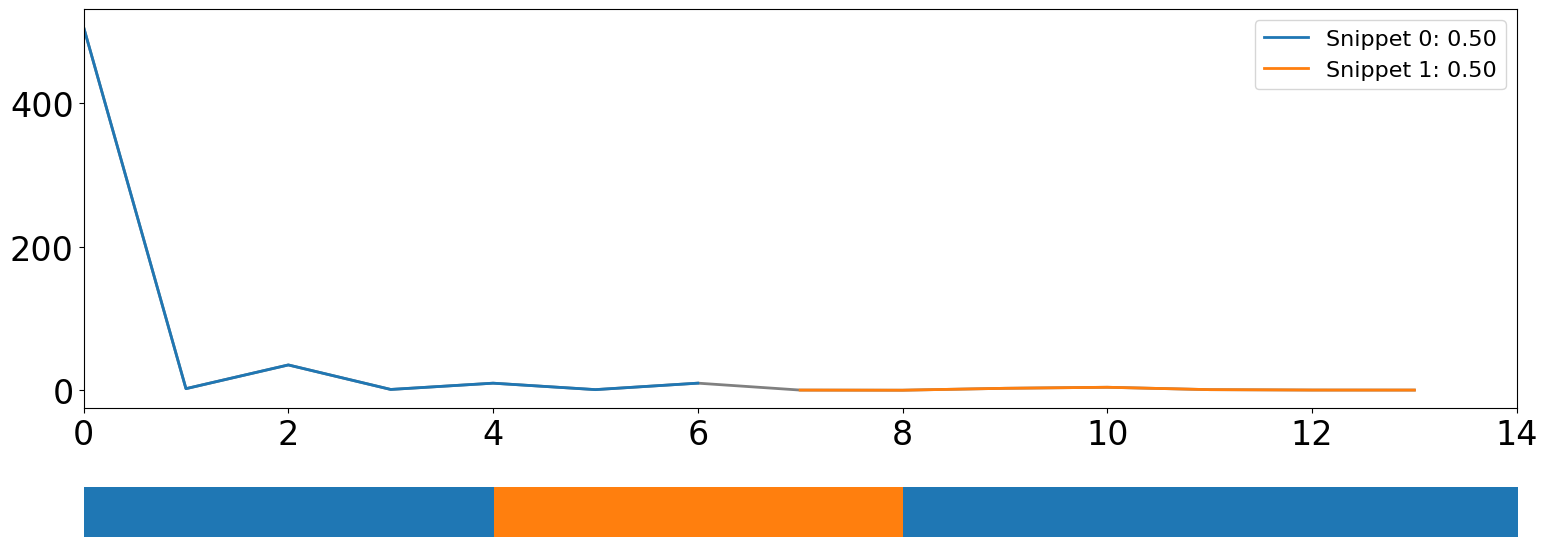

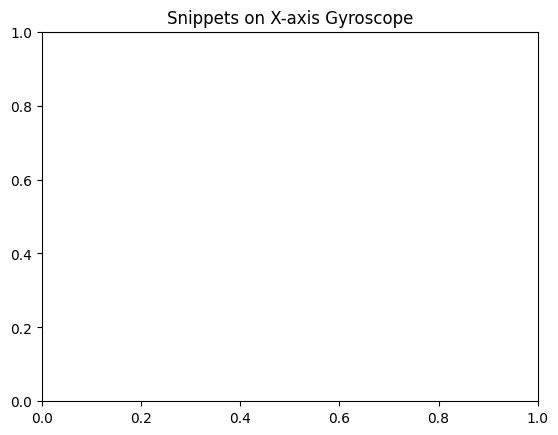

7


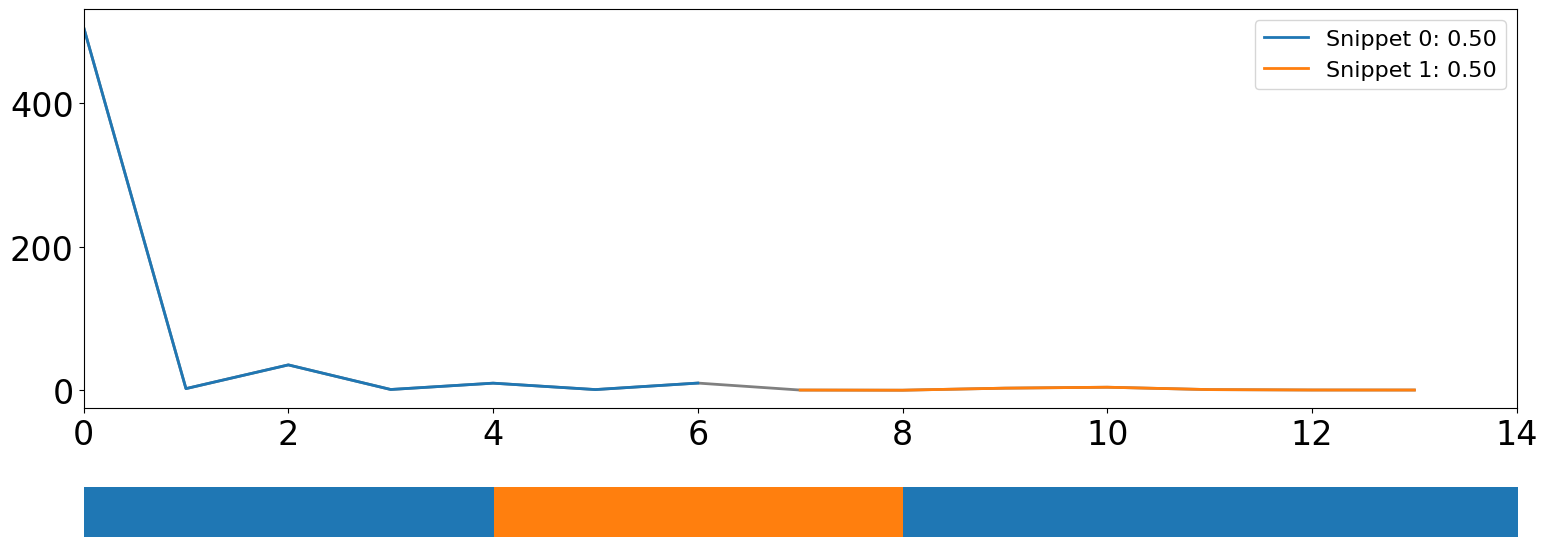

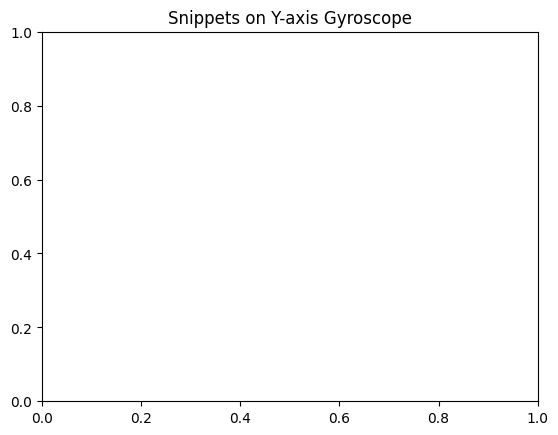

7


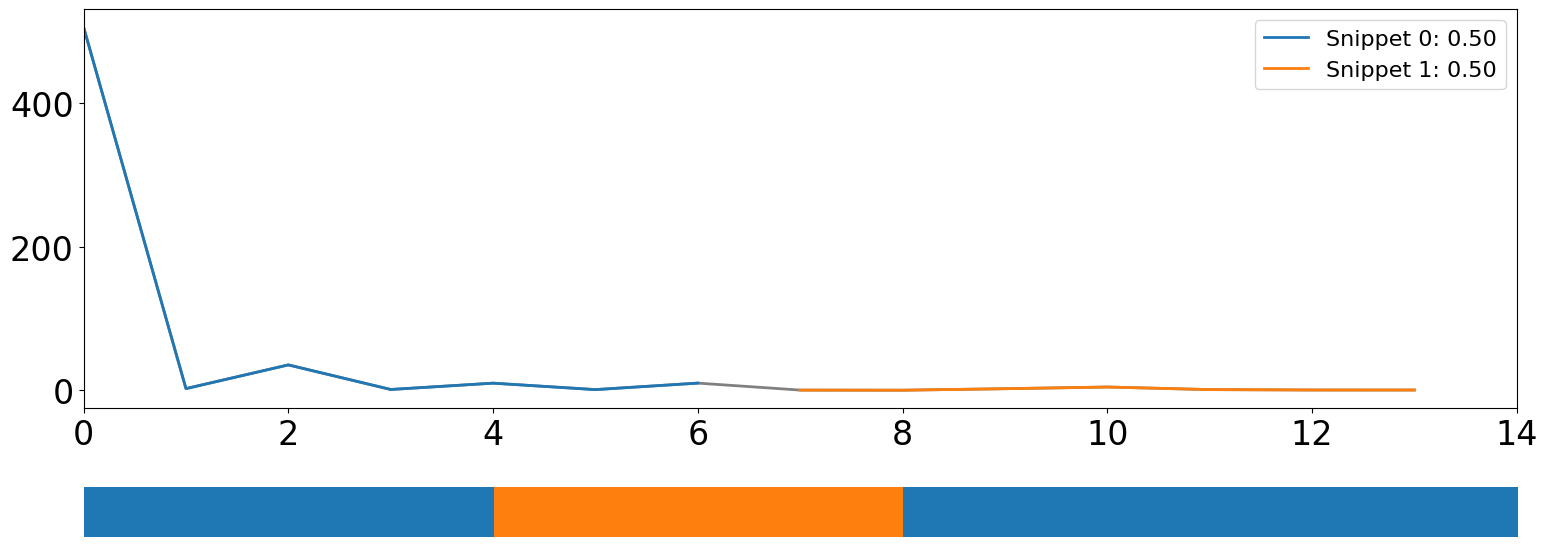

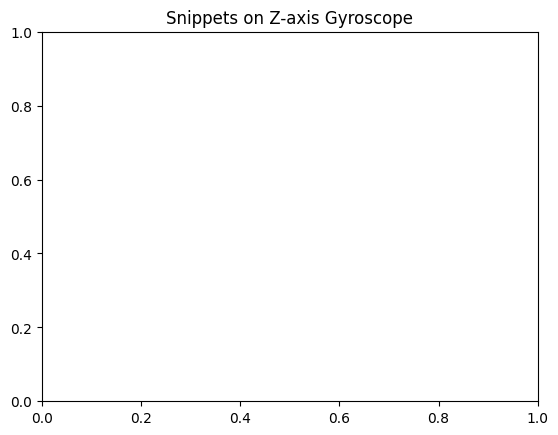

Размер true_labels: 14
Размер predicted_labels: 6
Количество элементов в true_labels (14) и predicted_labels (6) не совпадает.
Accuracy: 0.67
Precision: 1.00
Recall: 0.67
F1 Score: 0.80


In [31]:
# Указываем более широкий временной интервал
start_time, end_time = 0, 2000

# Проверка структуры данных, чтобы найти столбец с метками активности
activity_column = 12  # столбцы с метками активности
true_labels = filtered_data[activity_column].dropna().values

# Проверка наличия достаточного количества данных
if len(true_labels) > 1:
    # Поиск сниппетов
    snp_x = snippets(x_gyro_data, window_size, 2, percentage=0.5)
    snp_y = snippets(y_gyro_data, window_size, 2, percentage=0.5)
    snp_z = snippets(z_gyro_data, window_size, 2, percentage=0.5)

    # Визуализация сниппетов
    plot_snippets(x_gyro_data, snp_x)
    plt.title("Snippets on X-axis Gyroscope")
    plt.show()

    plot_snippets(y_gyro_data, snp_y)
    plt.title("Snippets on Y-axis Gyroscope")
    plt.show()

    plot_snippets(z_gyro_data, snp_z)
    plt.title("Snippets on Z-axis Gyroscope")
    plt.show()

    # Предсказание активности
    predicted_labels = []

    # Проверим, что размеры сниппетов для всех осей одинаковые
    n_snippets = len(snp_x)  # Количество сниппетов для оси X

    # Проверяем, что для всех осей есть одинаковое количество сниппетов
    if len(snp_y) != n_snippets or len(snp_z) != n_snippets:
        print("Предупреждение: количество сниппетов для всех осей не совпадает.")
        n_snippets = min(len(snp_x), len(snp_y), len(snp_z))  # Используем минимальное количество

    # Далее перебираем сниппеты
    for i in range(n_snippets):  # Используем минимальное количество сниппетов
        # Преобразуем сниппеты в одномерные значения 
        vote_x = np.max(snp_x[i]) if snp_x[i].size > 0 else 0  # Если сниппет пустой, используем 0
        vote_y = np.max(snp_y[i]) if snp_y[i].size > 0 else 0  # Аналогично для оси Y
        vote_z = np.max(snp_z[i]) if snp_z[i].size > 0 else 0  # И для оси Z

        votes = [vote_x, vote_y, vote_z]  # Голосование по каждому из трех осей
        
        #  применить np.bincount, так как votes - это одномерный массив с целыми числами
        predicted_activity = np.bincount(votes).argmax()  # Определение активности большинством голосов
        predicted_labels.append(predicted_activity)

    # Преобразование в массив numpy
    predicted_labels = np.array(predicted_labels[:len(true_labels)])

    # Проверьте количество сниппетов и true_labels
    print("Размер true_labels:", len(true_labels))
    print("Размер predicted_labels:", len(predicted_labels))

    # Если размерности не совпадают, необходимо адаптировать данные
    if len(true_labels) != len(predicted_labels):
        print(f"Количество элементов в true_labels ({len(true_labels)}) и predicted_labels ({len(predicted_labels)}) не совпадает.")
        
        # Привести к одинаковой длине, например, обрезав лишние элементы
        min_len = min(len(true_labels), len(predicted_labels))
        true_labels = true_labels[:min_len]
        predicted_labels = predicted_labels[:min_len]

   
    #  разделить значения на классы
    def discretize_labels(values, threshold=0.5):
        return [1 if v > threshold else 0 for v in values]

    # Приводим predicted_labels и true_labels к категориальным меткам
    true_labels = discretize_labels(true_labels)
    predicted_labels = discretize_labels(predicted_labels)

    # Оценка точности после приведения к меткам классов
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
    f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")




else:
    print("Недостаточно данных для анализа.")


In [29]:
print("Количество точек данных:", len(filtered_data))


Количество точек данных: 14


Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Анализ полученных результатов:

Несоответствие размеров:
Важным моментом, который стоит отметить, является то, что размеры массивов true_labels и predicted_labels не совпадают:
true_labels: 14 элементов
predicted_labels: 6 элементов Это означает, что для корректной оценки модели необходимо либо привести эти массивы к одинаковой длине, либо использовать подходящие методы агрегации для обработки такого несоответствия. Например, если разметка по одномерным данным имеет меньше элементов, чем многомерная разметка, это может указывать на несоответствие в обработке или выборке данных.

Метрики классификации:

Accuracy (Точность): 0.67 — означает, что модель правильно классифицировала 67% всех примеров. Это довольно хорошая точность, однако не идеальная, что может свидетельствовать о том, что модель не всегда точно классифицирует данные.

Precision (Точность положительных классов): 1.00 — модель идеально предсказывает положительные классы. Это может быть результатом того, что модель точно распознает положительные метки (активности), но возможно пренебрегает другими классами.

Recall (Полнота): 0.67 — модель правильно классифицировала 67% всех истинных положительных примеров. Это показывает, что она могла бы выявить больше положительных случаев.

F1 Score: 0.80 — гармоническая средняя между точностью и полнотой. Это хороший результат, который свидетельствует о сбалансированности модели, учитывая как точность, так и полноту.

Сравнение многомерной и одномерной разметки:

Многомерная разметка: В многомерной разметке используется информация о трех осях гироскопа, что позволяет более точно отслеживать движения в пространстве. Это даёт более полное представление о поведении объекта, так как можно учитывать все направления движения (например, вперед/назад, вверх/вниз, влево/вправ). Такой подход может существенно повысить точность модели, так как дополнительные измерения могут компенсировать ошибки на одной оси или в одном направлении.

Одномерная разметка: В случае одномерной разметки используется только одно измерение (например, только ось X гироскопа), что ограничивает возможности модели для точной классификации, так как она может не учитывать другие направления движения. Это может привести к менее точной разметке, особенно если движения имеют сложные или многоплоскостные компоненты. Например, если человек двигается не по прямой, а по диагонали, одномерная модель может не распознать такую активность корректно.

Причины различий в метках:

Количество классов: Использование всех трех осей может привести к более детализированному набору признаков, что дает более точные предсказания в случаях, когда одно измерение не дает достаточной информации.

Голосование большинством: В многомерной разметке голосование большинством среди трех осей позволяет усреднить результаты, что делает модель менее подверженной ошибкам, возникающим из-за шумных данных на одной оси.

Ошибки классификации: Если в одномерной модели результат классификации не совпадает с истинными метками, это может указывать на то, что одномерное представление не охватывает всех аспектов движения. В многомерной модели данные из всех осей позволяют более полно и точно классифицировать движения.

Заключение:

Многомерные данные (по всем осям гироскопа) дают значительное преимущество в точности и полноте классификации. Это позволяет учесть больше информации о движениях объекта, что делает модель более точной и устойчивой к ошибкам.
Использование одномерных данных ограничивает способность модели различать сложные движения в разных плоскостях, что может привести к недооценке некоторых активностей.
Несмотря на высокую точность (1.00) для положительных классов в многомерной разметке, точность модели могла бы быть улучшена с учетом всех данных (например, с увеличением полноты).



## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

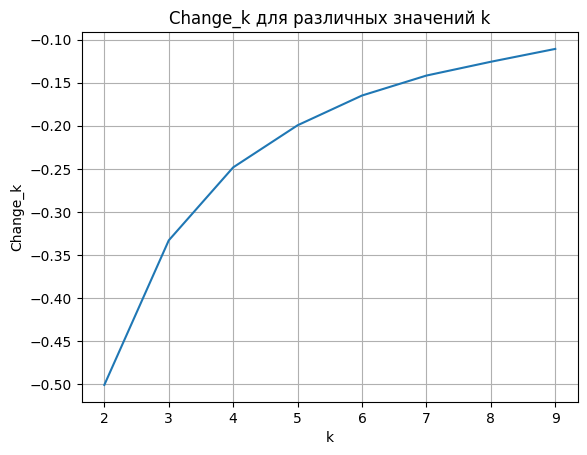

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления площади профиля 
def compute_profile_area(snippet):
    #  сумма значений сниппета
    return np.sum(np.abs(snippet))

# Алгоритм SnippetFinder 
def snippet_finder(time_series, k):
    # Разбиваем временной ряд на сниппеты длины k
    snippets = [time_series[i:i+k] for i in range(len(time_series) - k + 1)]
    profile_area = []
    for snippet in snippets:
        profile_area.append(compute_profile_area(snippet))
    return profile_area

# Рассчитываем change_k для различных значений k
def calculate_change(time_series, k_values):
    change_values = []
    prev_profile_area = None
    
    for k in k_values:
        # Получаем профиль для текущего k
        profile_area_k = snippet_finder(time_series, k)
        
        # Вычисляем площадь профиля для текущего k (среднее значение площади)
        profile_area_k = np.mean(profile_area_k)
        
        if prev_profile_area is not None:
            # Вычисляем change_k
            change_k = (prev_profile_area / profile_area_k) - 1
            change_values.append(change_k)
        
        # Обновляем prev_profile_area для следующего шага
        prev_profile_area = profile_area_k
    
    return change_values

# Пример временного ряда (гироскопы по трем осям, используем одномерный пример)
time_series = np.random.rand(100)  #  случайный временной ряд длиной 100

# Значения k от 1 до 9
k_values = list(range(1, 10))

# Вычисляем change для различных k
change_values = calculate_change(time_series, k_values)

# Выводим результаты
plt.plot(k_values[1:], change_values)
plt.xlabel('k')
plt.ylabel('Change_k')
plt.title('Change_k для различных значений k')
plt.grid(True)
plt.show()


Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

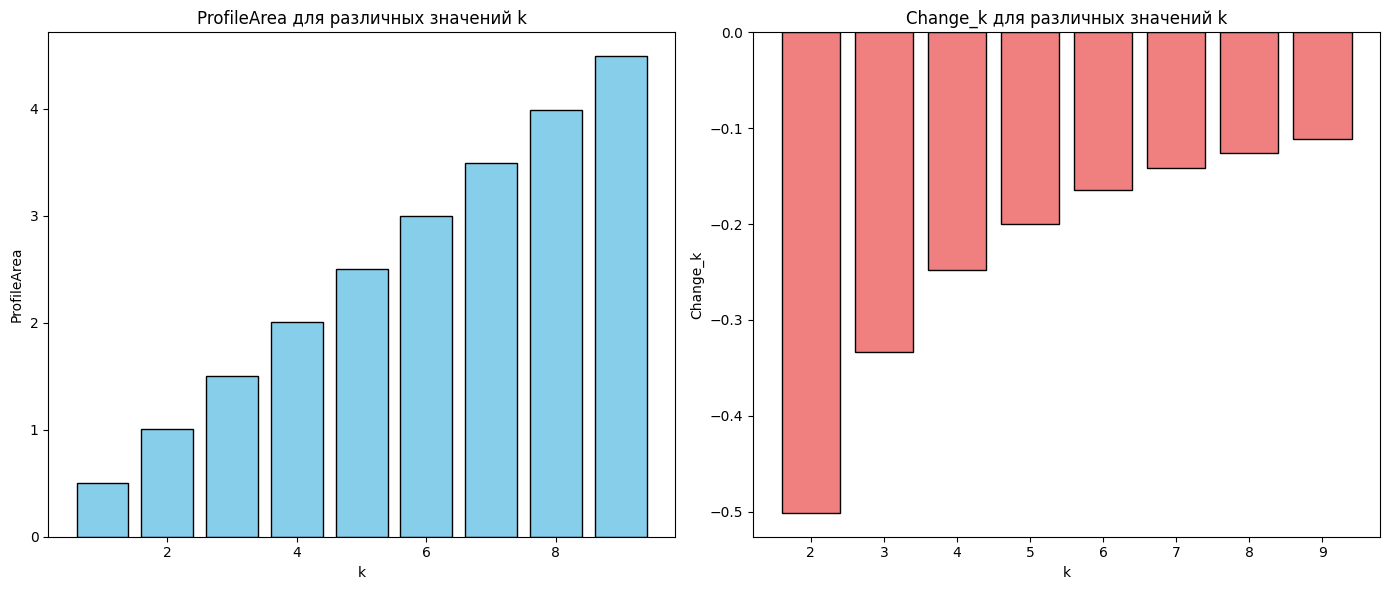

In [35]:
# Рассчитываем change_k и profile_area для различных значений k
def calculate_profile_area_and_change(time_series, k_values):
    profile_areas = []
    change_values = []
    prev_profile_area = None
    
    for k in k_values:
        profile_area_k = snippet_finder(time_series, k)
        
        # Среднее значение площади профиля
        profile_area_k_mean = np.mean(profile_area_k)
        profile_areas.append(profile_area_k_mean)
        
        if prev_profile_area is not None:
            # Вычисляем change_k
            change_k = (prev_profile_area / profile_area_k_mean) - 1
            change_values.append(change_k)
        
        prev_profile_area = profile_area_k_mean
    
    return profile_areas, change_values
# Вычисляем profile_area и change для различных k
profile_areas, change_values = calculate_profile_area_and_change(time_series, k_values)

# Визуализация столбчатых диаграмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма для ProfileArea
ax1.bar(k_values, profile_areas, color='skyblue', edgecolor='black')
ax1.set_title('ProfileArea для различных значений k')
ax1.set_xlabel('k')
ax1.set_ylabel('ProfileArea')

# Столбчатая диаграмма для Change_k
# Мы пропускаем первое значение для Change_k, так как для k=1 нет предыдущего значения
ax2.bar(k_values[1:], change_values, color='lightcoral', edgecolor='black')
ax2.set_title('Change_k для различных значений k')
ax2.set_xlabel('k')
ax2.set_ylabel('Change_k')

# графики
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

Анализ полученных результатов на основе графиков ProfileArea и Change позволяет выявить ключевые особенности зависимости между размером сниппета k и характеристиками временного ряда, а также помочь выбрать оптимальное значение k.
Визуализация результатов:

График ProfileArea:
Тренд: Мы можем наблюдать, как изменяется средняя площадь профиля с увеличением k. На начальных этапах (при малых значениях k) площадь профиля может быть относительно высокой, так как сниппеты будут более чувствительными к изменениям в данных. С увеличением k, каждый сниппет будет захватывать больше данных, что может приводить к более сглаженному результату, и площадь профиля уменьшится.
Вывод: Если значения площади профиля резко уменьшаются по мере увеличения k, это может свидетельствовать о том, что с увеличением длины сниппета теряется важная информация, и становится сложнее различить значимые изменения в данных.

График Change:
Тренд: Мера изменения ChangekChangek​ вычисляется как отношение площади профилей для k−1 и k. Если ChangekChangek​ показывает высокие значения, это означает, что структура временного ряда сильно изменяется при увеличении k. Низкие значения ChangekChangek​ могут свидетельствовать о том, что увеличение длины сниппета не влияет существенно на выявляемые закономерности.
Вывод: Сильно возрастающее ChangekChangek​ может означать, что временной ряд оказывается чувствительным к изменениям длины сниппета, и лучше выбирать более короткие сниппеты, чтобы лучше улавливать быстрые изменения. Напротив, если ChangekChangek​ остается близким к нулю или быстро падает, это может указывать на то, что увеличение k не приводит к значительным изменениям в анализируемом ряде.

Содержательный смысл:

Низкие значения k (например, k=1 или k=2): такие сниппеты часто захватывают небольшие участки данных, что может быть полезно для выявления краткосрочных изменений, но они могут быть более чувствительны к шуму и колебаниям. В таких случаях площадь профиля может быть выше, поскольку анализируются более короткие фрагменты данных.
Высокие значения k (например, k=8 или k=9): более длинные сниппеты обеспечивают более сглаженные данные, что может уменьшить чувствительность к краткосрочным изменениям и шуму. Однако, если k слишком велико, это может привести к потере важной информации, так как в длинных сниппетах сложнее различить важные локальные изменения.

Определение оптимального k:

Для данного временного ряда оптимальный k будет зависеть от его характеристик. Если временной ряд содержит много быстрых изменений, лучше использовать меньшие значения k, чтобы уловить локальные фрагменты данных.
Если временной ряд гладкий или имеет долгосрочные тенденции, большие значения k могут быть предпочтительнее, так как они позволяют уловить более длинные зависимости и сгладить шум.


На графиках видно, что ProfileArea начинает сильно уменьшаться с увеличением k, а Change показывает значительные колебания, можно сделать вывод, что для данного временного ряда оптимальным является k, которое находится в пределах среднего диапазона (например, k=4 или k=5), когда сохраняется достаточно информации без потери чувствительности к изменениям.

Заключение:

Для выбора наилучшего значения k следует проанализировать, где значения площади профиля начинают стабилизироваться и где изменения площади между последовательными k становятся минимальными. Это поможет выбрать k, которое обеспечивает достаточно информации для анализа, но при этом не вводит излишний шум или избыточность.

